<a href="https://colab.research.google.com/github/ArthurKuster19/Trabalho-controle-2/blob/main/Trabalho_2_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control numpy matplotlib scipy

import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
# Definição do sistema original com K = 20
# Função de transferência original G(s) = 20 / (s(s+2))
numerador = [20]
denominador = [1, 2, 0]
system = ctrl.TransferFunction(numerador, denominador)

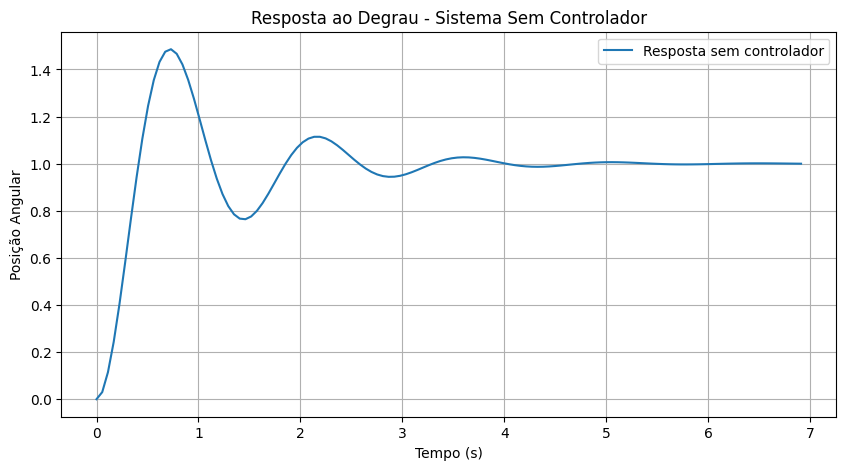

In [ ]:
# 1. Resposta ao degrau em malha fechada (sem controlador)
time, response = ctrl.step_response(ctrl.feedback(system, 1))
plt.figure(figsize=(10, 5))
plt.plot(time, response, label="Resposta sem controlador")
plt.title("Resposta ao Degrau - Sistema Sem Controlador")
plt.xlabel("Tempo (s)")
plt.ylabel("Posição Angular")
plt.grid(True)
plt.legend()
plt.show()

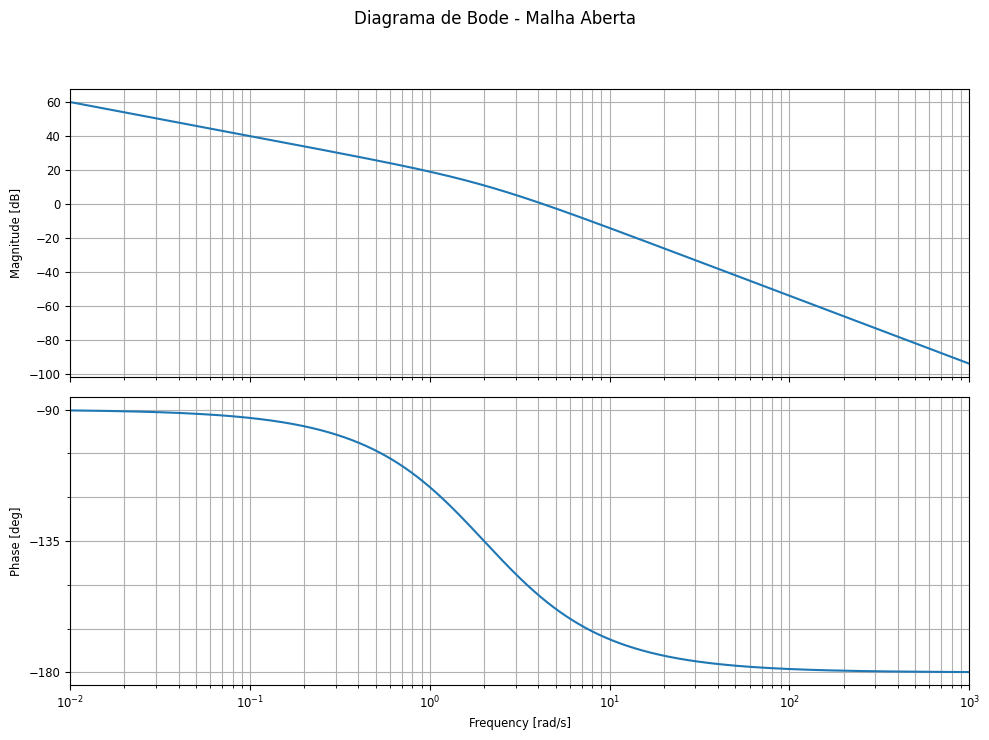

Margem de ganho (GM): inf dB
Margem de fase (PM): 25.18 graus
Frequência de ganho cruzado (ωg): nan rad/s
Frequência de fase cruzada (ωf): 4.25 rad/s


In [ ]:
# 2. Diagramas de Bode
plt.figure(figsize=(10, 7))
ctrl.bode_plot(system, dB=True, omega_limits=(0.01, 1000))
plt.suptitle("Diagrama de Bode - Malha Aberta", y=1.05)
plt.show()

# Margens de ganho e fase
gm, pm, wg, wf = ctrl.margin(system)
print(f"Margem de ganho (GM): {gm:.2f} dB")
print(f"Margem de fase (PM): {pm:.2f} graus")
print(f"Frequência de ganho cruzado (ωg): {wg:.2f} rad/s")
print(f"Frequência de fase cruzada (ωf): {wf:.2f} rad/s")

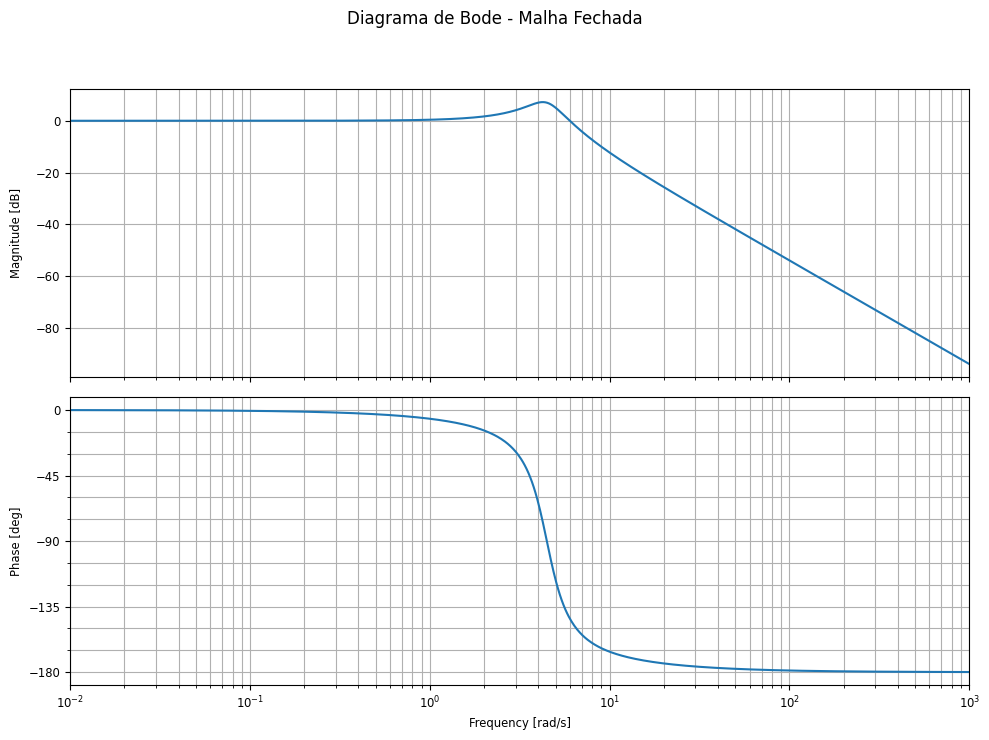

Pico de ressonância: 7.21 dB
Frequência de ressonância: 4.24 rad/s
Banda de passagem: 0.10 rad/s a 6.70 rad/s


/usr/local/lib/python3.10/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


In [ ]:
malha_fechada = ctrl.feedback(system, 1)
plt.figure(figsize=(10, 7))
ctrl.bode_plot(malha_fechada, dB=True, omega_limits=(0.01, 1000))
plt.suptitle("Diagrama de Bode - Malha Fechada", y=1.05)
plt.show()

# Determinar frequência e valor máximo da magnitude (pico de ressonância)
mag, phase, omega = ctrl.bode_plot(malha_fechada, dB=True, omega_limits=(0.1, 100), plot=False)
pico_res_magnitude = max(20 * np.log10(mag))  # Converte magnitude para dB
pico_res_freq = omega[np.argmax(20 * np.log10(mag))]  # Frequência correspondente

print(f"Pico de ressonância: {pico_res_magnitude:.2f} dB")
print(f"Frequência de ressonância: {pico_res_freq:.2f} rad/s")

mag_dB = 20 * np.log10(mag)

# Identificar as frequências de -3 dB
indices_banda_passagem = np.where(mag_dB >= -3)[0]
frequencia_inicial = omega[indices_banda_passagem[0]]
frequencia_final = omega[indices_banda_passagem[-1]]

print(f"Banda de passagem: {frequencia_inicial:.2f} rad/s a {frequencia_final:.2f} rad/s")

Pico de ressonância: 7.21 dB
Frequência de ressonância: 4.24 rad/s
Banda de passagem: 0.10 rad/s a 6.70 rad/s


In [ ]:
# 3. Projeto de controladores
# (a) Controlador Atraso
# Gc(s) = (s + z1) / (s + p1) -> Defina os valores de z1 e p1
z1, p1 = 0.1, 0.01
delay_controller = ctrl.TransferFunction([1, z1], [1, p1])

# Novo sistema com controlador atraso
system_delay = ctrl.feedback(delay_controller * system, 1)
time_delay, response_delay = ctrl.step_response(system_delay)

# Controlador Avanço
# Gc(s) = (s + z2) / (s + p2) -> Defina os valores de z2 e p2
z2, p2 = 10, 20
lead_controller = ctrl.TransferFunction([1, z2], [1, p2])

# Novo sistema com controlador avanço
system_lead = ctrl.feedback(lead_controller * system, 1)
time_lead, response_lead = ctrl.step_response(system_lead)

# Controlador Atraso + Avanço
combined_controller = delay_controller * lead_controller
system_combined = ctrl.feedback(combined_controller * system, 1)
time_combined, response_combined = ctrl.step_response(system_combined)

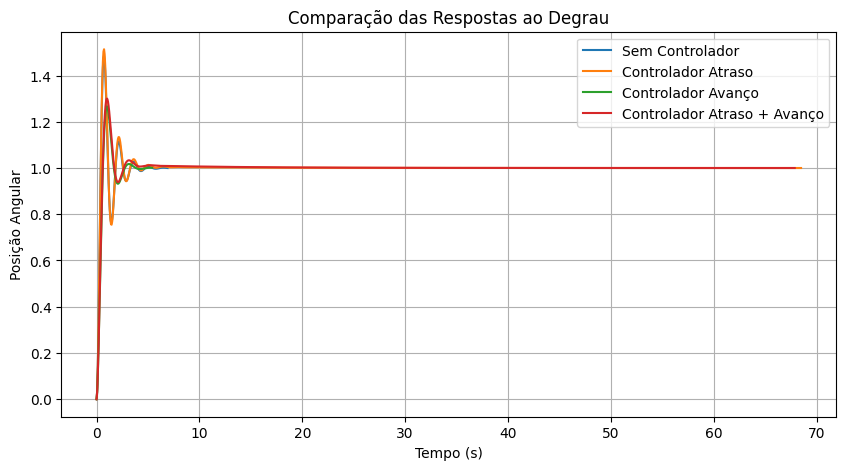

In [ ]:
# 5. Comparação das respostas ao degrau
plt.figure(figsize=(10, 5))
plt.plot(time, response, label="Sem Controlador")
plt.plot(time_delay, response_delay, label="Controlador Atraso")
plt.plot(time_lead, response_lead, label="Controlador Avanço")
plt.plot(time_combined, response_combined, label="Controlador Atraso + Avanço")
plt.title("Comparação das Respostas ao Degrau")
plt.xlabel("Tempo (s)")
plt.ylabel("Posição Angular")
plt.legend()
plt.grid(True)
plt.show()